# Oasis Infobyte Internship
## Task 3 -  Email Spam Detection 

In [1]:
import pandas as pd
import numpy as np
import nltk

In [2]:
df = pd.read_csv('spam.csv',encoding= 'latin1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df = df.iloc[:,[0,1]]

In [4]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df.columns = ['Spam or ham','Messages']

In [6]:
df.head()

,Spam or ham,Messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## EDA

In [7]:
df.describe()

,Spam or ham,Messages
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [8]:
df.groupby('Spam or ham').describe()

Messages         \
               count unique   
Spam or ham                   
ham             4825   4516   
spam             747    653   

                                                                     
                                                           top freq  
Spam or ham                                                          
ham                                     Sorry, I'll call later   30  
spam         Please call our customer service representativ...    4

Let's check length for each message

In [9]:
df['length'] = df['Messages'].apply(len)

In [10]:
df.head()

,Spam or ham,Messages,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:ylabel='Frequency'>

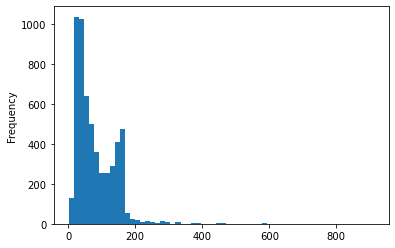

In [12]:
df['length'].plot.hist(bins = 60)

In [13]:
spam = df[df['Spam or ham']== 'spam']
ham = df[df['Spam or ham']== 'ham']

Text(0.5, 1.0, 'Ham')

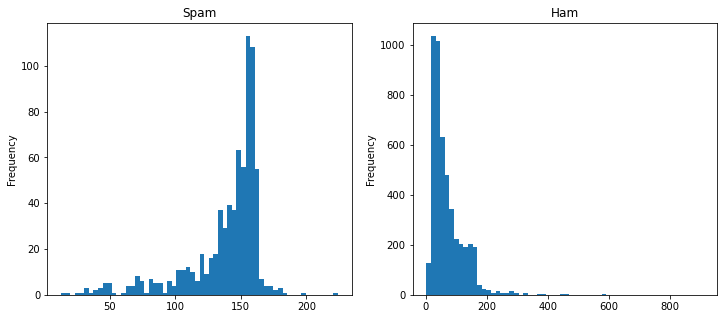

In [14]:
plt.subplot(1,2,1)
spam['length'].plot.hist(bins = 60,figsize = (12,5))
plt.title('Spam')
plt.subplot(1,2,2)
ham['length'].plot.hist(bins = 60)
plt.title('Ham')

Looks like spam messages tend to have more characters

In [15]:
import string
check = 'Hello! this is :Vinayak.'

In [16]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [17]:
nope = [char for char in check if char not in string.punctuation]
nope

['H',
 'e',
 'l',
 'l',
 'o',
 ' ',
 't',
 'h',
 'i',
 's',
 ' ',
 'i',
 's',
 ' ',
 'V',
 'i',
 'n',
 'a',
 'y',
 'a',
 'k']

In [18]:
nope = ''.join(nope)

In [19]:
nope

'Hello this is Vinayak'

In [20]:
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [21]:
[word for word in nope.split() if word.lower() not in stopwords.words('english')]

['Hello', 'Vinayak']

In [22]:
#now we will apply same preprocessing on the df messages columns

In [23]:
def text_process(mess):
    
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again.
    nopunc = ''.join(nopunc)
    
    # Now just remove stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [24]:
df['Messages'].head(2).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
Name: Messages, dtype: object

In [25]:
#vectorization
from sklearn.feature_extraction.text import CountVectorizer

In [26]:
transformer = CountVectorizer(analyzer= text_process).fit(df['Messages'])

In [27]:
message3 = df['Messages'][2]
print(message3)

Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


In [28]:
trans3 = transformer.transform([message3])

In [29]:
print(trans3)

  (0, 73)	1
  (0, 422)	1
  (0, 429)	1
  (0, 442)	1
  (0, 860)	1
  (0, 1529)	1
  (0, 1808)	2
  (0, 1909)	1
  (0, 2754)	1
  (0, 3882)	1
  (0, 4652)	1
  (0, 5535)	1
  (0, 6244)	2
  (0, 6470)	1
  (0, 9050)	1
  (0, 9091)	1
  (0, 9143)	1
  (0, 10398)	1
  (0, 10570)	1
  (0, 10964)	1
  (0, 11003)	1


In [30]:
print(len(transformer.vocabulary_))

11304


In [31]:
print(trans3.shape)

(1, 11304)


In [32]:
transformer.get_feature_names_out()[6244]

'entry'

In [33]:
message3

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

In [34]:
messages_transform = transformer.transform(df["Messages"])

In [35]:
print(messages_transform)

  (0, 1096)	1
  (0, 1461)	1
  (0, 2027)	1
  (0, 4574)	1
  (0, 5135)	1
  (0, 5136)	1
  (0, 5685)	1
  (0, 6131)	1
  (0, 6815)	1
  (0, 6846)	1
  (0, 7456)	1
  (0, 7567)	1
  (0, 8231)	1
  (0, 8809)	1
  (0, 10845)	1
  (0, 11043)	1
  (1, 2407)	1
  (1, 3012)	1
  (1, 7600)	1
  (1, 8482)	1
  (1, 10582)	1
  (1, 10952)	1
  (2, 73)	1
  (2, 422)	1
  (2, 429)	1
  :	:
  (5568, 6604)	1
  (5568, 6791)	1
  (5568, 7065)	1
  (5568, 11239)	1
  (5569, 3169)	1
  (5569, 3655)	1
  (5569, 8147)	1
  (5569, 10087)	1
  (5570, 4430)	1
  (5570, 4973)	1
  (5570, 5169)	1
  (5570, 6196)	1
  (5570, 6612)	1
  (5570, 6710)	1
  (5570, 6892)	1
  (5570, 7190)	1
  (5570, 7297)	1
  (5570, 7698)	1
  (5570, 8314)	1
  (5570, 9804)	1
  (5570, 10669)	1
  (5570, 10886)	1
  (5571, 3370)	1
  (5571, 8243)	1
  (5571, 10532)	1


In [36]:
print('Shape of Sparse Matrix: ', messages_transform.shape)
print('Amount of Non-Zero occurences: ', messages_transform.nnz)

Shape of Sparse Matrix:  (5572, 11304)
Amount of Non-Zero occurences:  50193


In [37]:
from sklearn.feature_extraction.text import TfidfTransformer

In [38]:
tfid_transformer = TfidfTransformer().fit(messages_transform)

In [39]:
messages_tfid = tfid_transformer.transform(messages_transform)

In [40]:
from sklearn.naive_bayes import MultinomialNB

In [41]:
model = MultinomialNB()
model.fit(messages_tfid,df['Spam or ham'])

MultinomialNB()

In [49]:
model.predict(messages_tfid[2])

array(['spam'], dtype='<U4')

In [47]:
df.head(3)

,Spam or ham,Messages,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155


In [50]:
prediction = model.predict(messages_tfid)

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_train, X_test, y_train, y_test = train_test_split(df['Messages'], df['Spam or ham'], test_size=0.3, random_state=42)

In [54]:
X_train

708     To review and KEEP the fantastic Nokia N-Gage ...
4338                   Just got outta class gonna go gym.
5029    Is there coming friday is leave for pongal?do ...
4921    Hi Dear Call me its urgnt. I don't know whats ...
2592    My friend just got here and says he's upping h...
                              ...                        
3772    I came hostel. I m going to sleep. Plz call me...
5191                               Sorry, I'll call later
5226        Prabha..i'm soryda..realy..frm heart i'm sory
5390                           Nt joking seriously i told
860                   In work now. Going have in few min.
Name: Messages, Length: 3900, dtype: object

In [55]:
from sklearn.pipeline import Pipeline

In [56]:
pipeline = Pipeline([('Bag_of_words',CountVectorizer(analyzer=text_process)),
                    ('tfidf',TfidfTransformer()),
                    ('classifier',MultinomialNB())])

In [57]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('Bag_of_words',
                 CountVectorizer(analyzer=<function text_process at 0x000001A95DD405E0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [58]:
predictions = pipeline.predict(X_test)

In [59]:
from sklearn.metrics import classification_report,confusion_matrix

In [60]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1453
        spam       1.00      0.70      0.83       219

    accuracy                           0.96      1672
   macro avg       0.98      0.85      0.90      1672
weighted avg       0.96      0.96      0.96      1672



In [61]:
print(confusion_matrix(y_test,predictions))

[[1453    0]
 [  65  154]]


In [62]:
import seaborn as sns
%matplotlib inline

<AxesSubplot:>

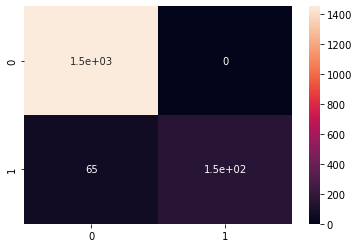

In [65]:
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)